In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/mulheres-em-ia/bootcamp-mia-2022/main/6.%20Classifica%C3%A7%C3%A3o%201/heart_failure_predict.csv")

In [44]:
df.head()


,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [45]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [46]:
df.shape

(368, 60)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [48]:
df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [49]:
df.Mortality.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

60 variáveis!! Precisamos selecionar só as mais relevantes. Também precisaremos balancear o nosso dataset

# Seleção de variáveis:
Antes de selecionar precisamos tratar as variáveis categóricas que estão como objeto, vamos usar o hot_encodign ou dummies:

In [50]:
cat_columns = []
for c in df.columns:
    if df[c].dtype=='object': 
        cat_columns.append(c)

In [51]:
cat_columns

['Age.Group',
 'Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [52]:
# a variavel Age.Group é ordinal, então vamos usar o label_encoding para ela
cat_columns.remove('Age.Group')

cat_columns

['Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [53]:
df2 = pd.get_dummies(df, columns=cat_columns) # fazendo a cópia para não alterar o dataset original

In [54]:
df2.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,41-50,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,51-60,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,51-60,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,51-60,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,51-60,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [55]:
le = LabelEncoder()

df2['Age.Group'] = le.fit_transform(df['Age.Group'])

In [56]:
le.classes_

array(['21-30', '31-40', '41-50', '51-60', '61-70'], dtype=object)

In [57]:
len(df2.columns)

167

In [58]:
X = df2.copy()
X.drop(columns='Mortality', inplace=True)

In [59]:
y = df2['Mortality']

Vamos remover primeiro as variáveis que são altamente correlacionadas entre si



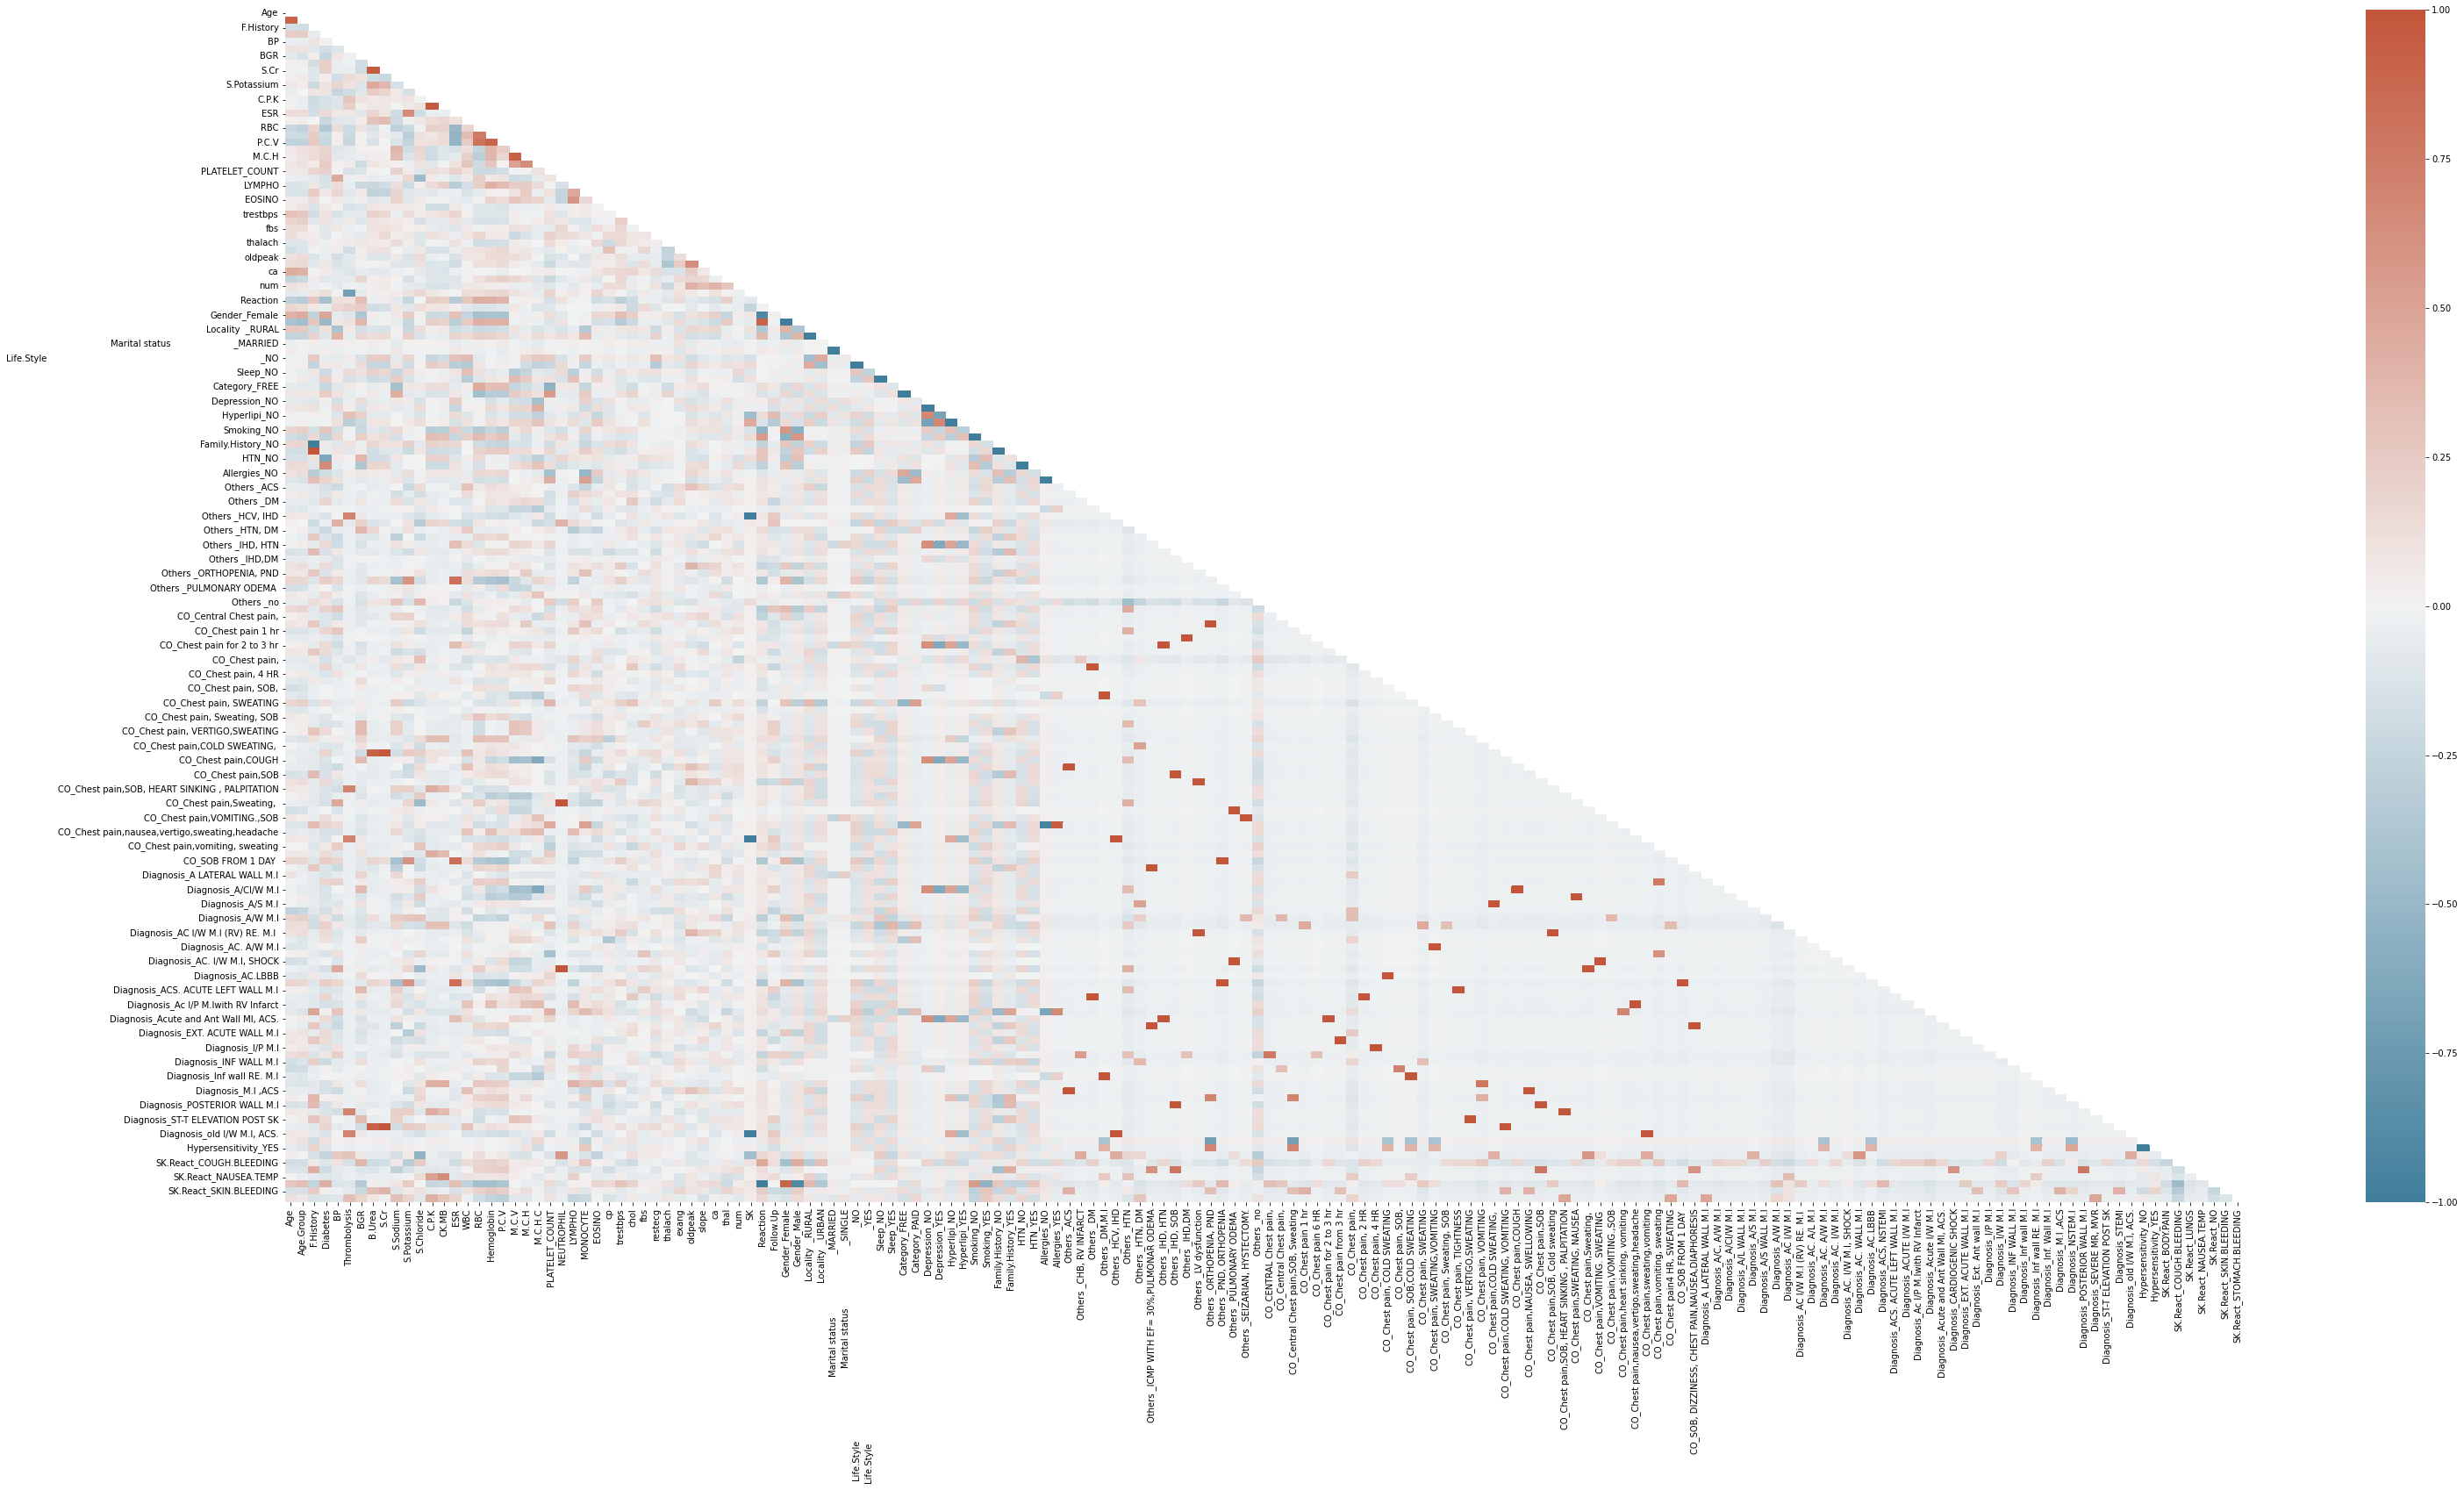

In [60]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [61]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital status                       _MARRIED - Marital status                       _SINGLE
Life.Style                                                                              _NO - Life.Style                                                                              _YES
Sleep_NO - Sleep_YES
Category_FREE - Category_PAID
Depression_NO - Depression_YES
Hyperlipi_NO - Hyperlipi

In [62]:
len(correlated_features)

60

In [63]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DIAPHORESIS',
 'Category_FREE',
 'Depression_NO',
 'F.History',
 'Family.History_NO',
 'Gender_Female',
 'Gender_Male',
 'HTN_NO',
 'Hyperlipi_NO',
 'Hypersen

In [64]:
# para clareza na hora da analise, não vamos remover o genero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [65]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [66]:
len(X_novo.columns)

106

Estimar informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes, e valores mais altos significam maior dependência.

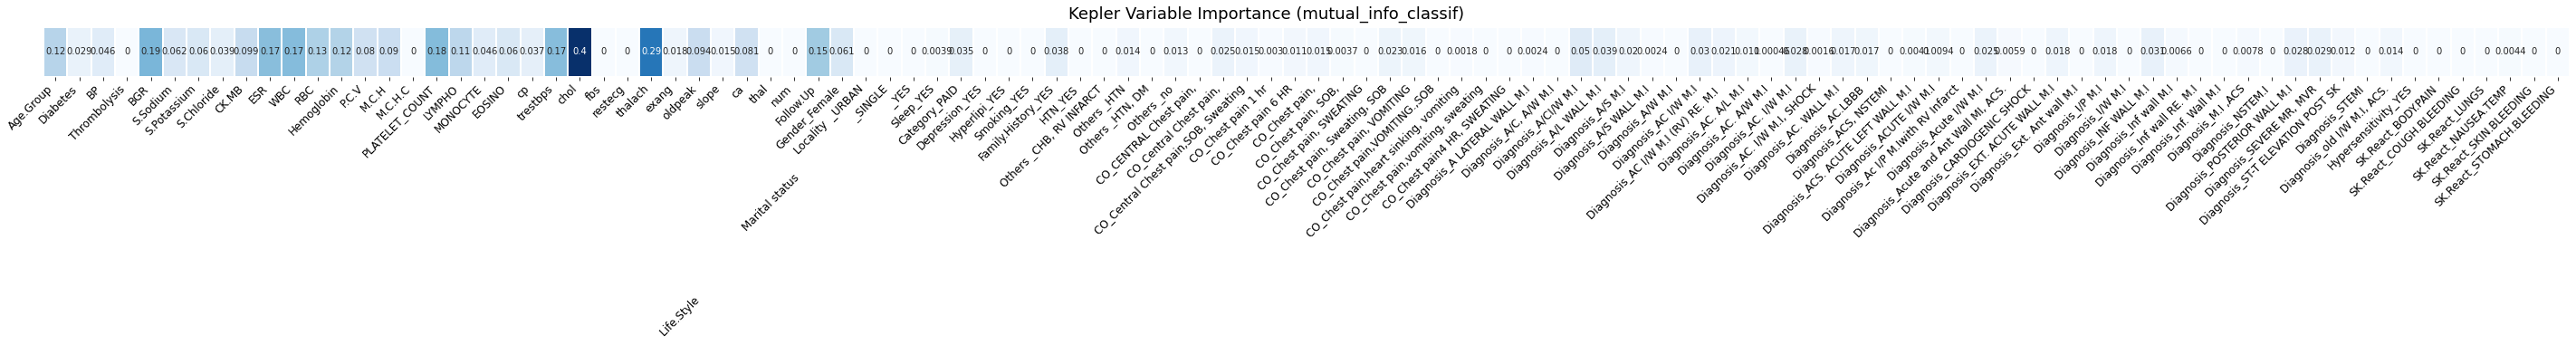

In [67]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)


Variáveis como sono, alergias e hipersensibilidade não afetam na mortalidade, tendo valor de MI igual a 0, enquanto variáveis como chol, thalach e idade, afetam mais diretamente a Mortalidade

In [68]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 30  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=30)
X_novo2 = trans.fit_transform(X_novo, y)

In [69]:
trans.get_support()

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False])

In [70]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'BP', 'BGR', 'S.Sodium', 'S.Potassium', 'S.Chloride',
       'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.H',
       'PLATELET_COUNT', 'LYMPHO', 'MONOCYTE', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'ca', 'Follow.Up', 'Others _CHB, RV INFARCT',
       'CO_CENTRAL Chest pain,', 'Diagnosis_A/L WALL M.I',
       'Diagnosis_AC. A/L M.I', 'Diagnosis_AC.LBBB', 'Diagnosis_ACS, NSTEMI',
       'Diagnosis_ACS. ACUTE LEFT WALL M.I', 'Diagnosis_old I/W M.I, ACS.',
       'SK.React_BODY.PAIN'],
      dtype='object')

In [71]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [72]:
X_novo2.head()

,Age.Group,BP,BGR,S.Sodium,S.Potassium,S.Chloride,CK.MB,ESR,WBC,RBC,...,Follow.Up,"Others _CHB, RV INFARCT","CO_CENTRAL Chest pain,",Diagnosis_A/L WALL M.I,Diagnosis_AC. A/L M.I,Diagnosis_AC.LBBB,"Diagnosis_ACS, NSTEMI",Diagnosis_ACS. ACUTE LEFT WALL M.I,"Diagnosis_old I/W M.I, ACS.",SK.React_BODY.PAIN
0,2.0,100.6,84.0,138.0,3.3,107.0,30.0,11.0,9900.0,4.26,...,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,90.6,135.0,144.0,4.7,104.0,30.0,27.0,15800.0,5.74,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,100.7,146.0,137.0,4.2,103.0,22.0,19.0,7900.0,4.83,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,160.1,146.0,137.0,4.2,103.0,22.0,19.0,7900.0,4.83,...,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,90.6,85.0,139.0,4.5,112.0,18.0,13.0,6900.0,4.41,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Features prontas! Vamos balancear as classes



In [73]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

Temos 80 casos de mortalidade apenas. Qual estratégia de balanceamento vcs acham melhor?? Por quê?

* **R:** Nesse caso, a melhor maneira de balancear é do tipo over-sampling, devido o dataset ser pequeno 

# Balanceamento 

* Teoricamente, um dataset que possua qualquer classe com mais de 50% das entradas já é considerado desbalanceado.

## Sampling 
Sampling é um pré-processamento que visa minimizar as discrepâncias entre as classes por meio de uma reamostragem.

* **Over-sampling:** cria novas observações da classe minoritária a partir das informações contidas nos dados originais. A vantagem é que nenhuma informação é descartada, porém o custo computacional será elevado e você irá deteriorar a performance do algoritmo para as classes minoritárias.
* **Under-sampling:** reduz o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências, ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.
* **Advanced Sampled Methods:** SMOTE e ADASYN

In [74]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [75]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [76]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [77]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [78]:
X_train.shape

(460, 32)

In [79]:
X_test.shape

(74, 32)

# Treinamento
Esse nosso primeiro modelo será uma K Nearest Neighbors (KNN). O scikit-learn já contém uma implementação do KNN. <br/>
<br/>
O Scikit Learn tem a implementação de vários outros algoritmos: [aqui](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)!

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**UHULLLLL! Temos nosso primeiro modelo de classificação \o/**

## Tarefa de casa:
Teste o KNN com diferentes valores de k! Qual K é o melhor para esse problema?
* **R:** k = 5 obteve os melhores parâmetros.

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.918918918918919

In [105]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [106]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


In [102]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.918918918918919

In [107]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [108]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7702702702702703

In [109]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [110]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


A acurácia cai bastante com k = 7

# Avaliando nosso modelo
Agora precisamos avaliar se o modelo está bom ou não!

Para isso, precisamos utilizá-lo para realizar as predições para nosso conjunto de teste:

In [87]:
preds = neigh.predict(X_test)

In [88]:
preds

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

A maioria dos modelos nos retorna uma uma probabilidade dos exemplos serem de cada uma das classes, ao invés da classe em si.

Usando predict_proba conseguimos extrair as probabilidades do KNN para o nosso conjunto de teste

In [89]:
neigh.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [1.

Vamos começar avaliando a acurácia:



In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [91]:
accuracy_score(y_test, preds)

0.7702702702702703

De todas as predições que nosso modelo fez, ele acertou em 91,89% dos casos.

Vamos avaliar a matriz de confusão:

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [93]:
cm = confusion_matrix(y_test, preds)

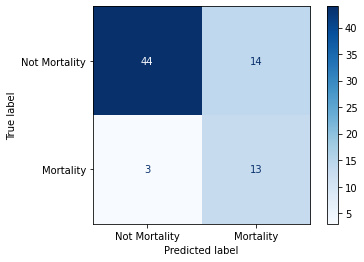

In [94]:
# plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

Pela matriz de confusão acima, parece que temos poucos erros!

Vamos avaliar a precisão e recall do nosso modelo:

In [95]:
print(classification_report(y_test, preds, target_names=['not_Mortality', 'Mortality']))

               precision    recall  f1-score   support

not_Mortality       0.94      0.76      0.84        58
    Mortality       0.48      0.81      0.60        16

     accuracy                           0.77        74
    macro avg       0.71      0.79      0.72        74
 weighted avg       0.84      0.77      0.79        74



Nesse report podemos ver as métricas de precision, recall e f1-score para ambas as classes.

Qual das duas classes o nosso modelo está identificando melhor?
* **R:** Esse modelo está avaliando melhor quando o target = 0 (Not Mortality)

E como seria para calcular a AUC-ROC?

In [96]:
from sklearn.metrics import roc_curve, auc

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)

auc(fpr, tpr)

0.7855603448275862

# Vamos ver como ficaria o modelo sem a seleção de features e sem balanceamento??


In [97]:
X.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,2,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,3,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,3,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,3,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,3,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [98]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [99]:
X_train_semfe, X_test_semfe, y_train_semfe, y_test_semfe = train_test_split(X, y, test_size=.2, random_state=1)

# Instanciando o classificador
neigh_semfe = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh_semfe.fit(X_train_semfe, y_train_semfe)

KNeighborsClassifier(n_neighbors=3)

               precision    recall  f1-score   support

not_Mortality       0.92      0.95      0.93        58
    Mortality       0.79      0.69      0.73        16

     accuracy                           0.89        74
    macro avg       0.85      0.82      0.83        74
 weighted avg       0.89      0.89      0.89        74

AUC: 0.8178879310344828


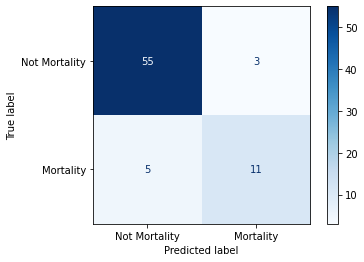

In [100]:
preds_semfe = neigh_semfe.predict(X_test_semfe)

cm_semfe = confusion_matrix(y_test_semfe, preds_semfe)

# plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_semfe, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test_semfe, preds_semfe, target_names=['not_Mortality', 'Mortality']))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr_semfe, tpr_semfe, thresholds_semfe = roc_curve(y_test_semfe, preds_semfe)

print('AUC: ' + str(auc(fpr_semfe, tpr_semfe)))

# Que outras coisas poderiamos fazer com o dataset para melhorar nossos resultados?
Tarefa de casa:

* mudar o threshold de correlação que está em 0.9 para outros valores
* aumentar ou diminuir a quantidade de features selecionadas pelo mutual information
* descobrir outras funções de distância

## Alterar o threshold de correlação 

In [112]:
X.shape

(368, 166)

In [113]:
y.shape

(368,)

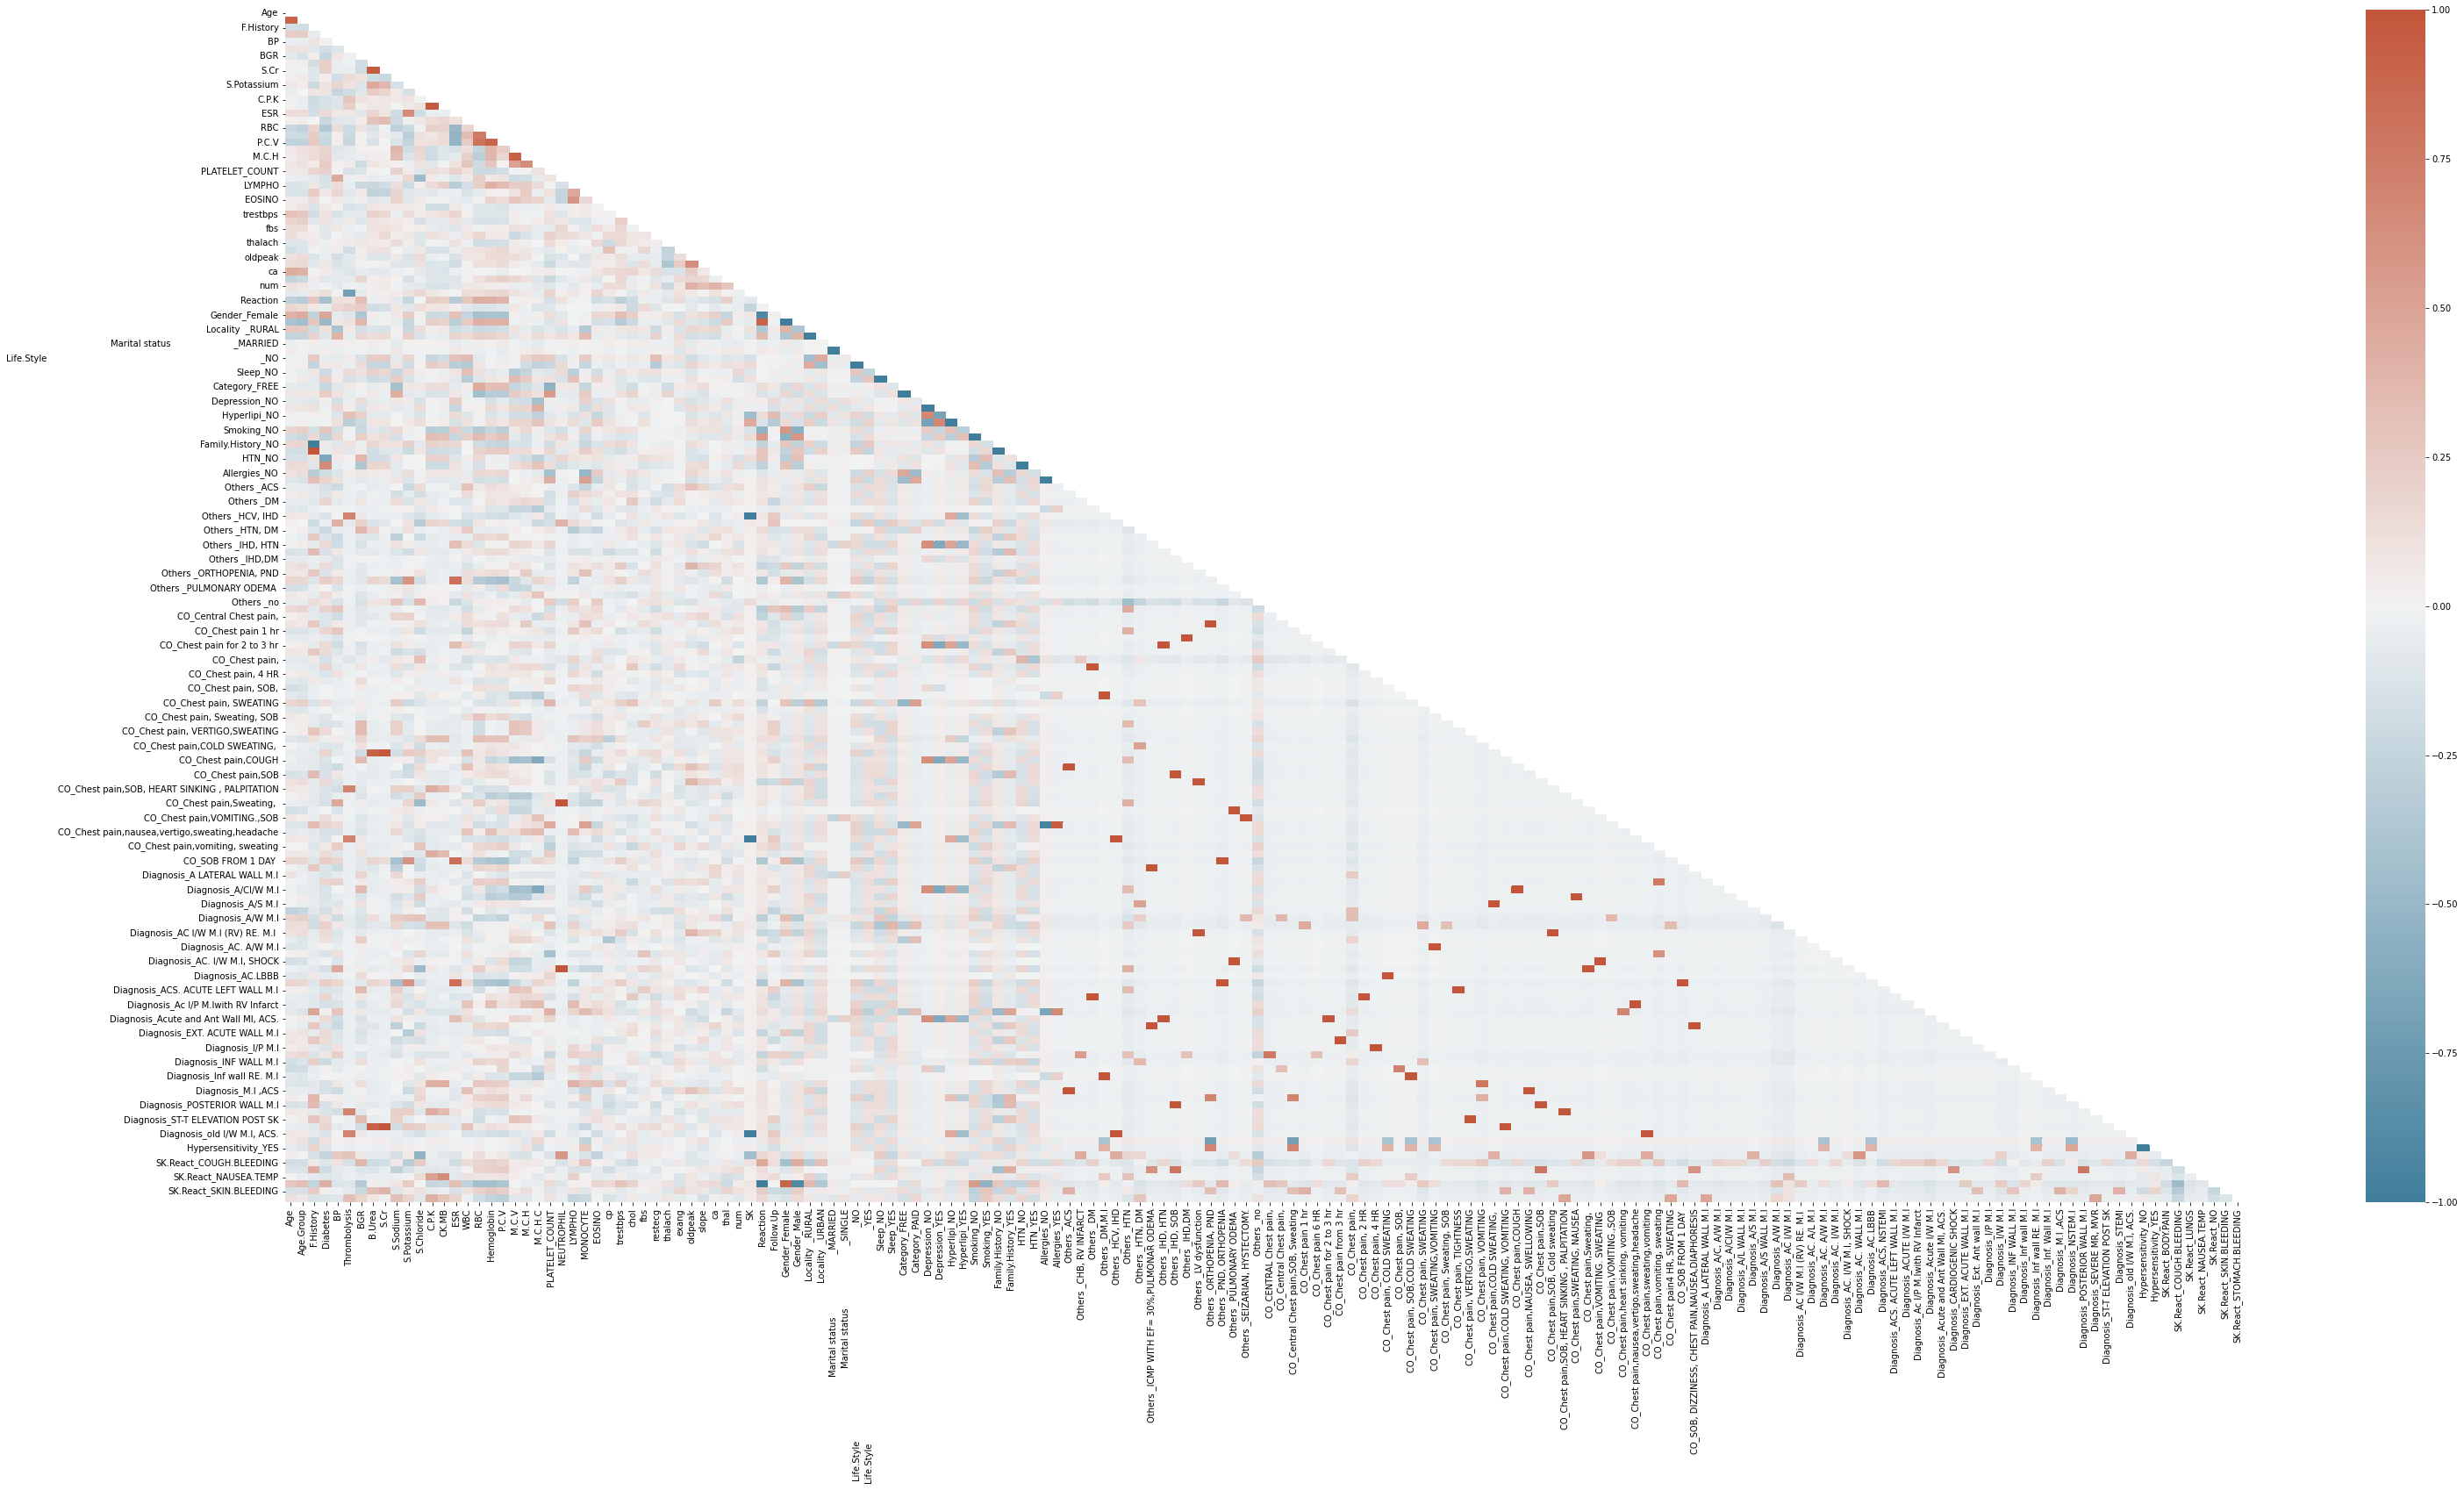

In [114]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [115]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
Thrombolysis - SK
Thrombolysis - Others _HCV, IHD
Thrombolysis - CO_Chest pain,SOB, HEART SINKING , PALPITATION
Thrombolysis - CO_Chest pain,sweating,vomiting
Thrombolysis - Diagnosis_SEVERE MR, MVR
Thrombolysis - Diagnosis_old I/W M.I, ACS.
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
ESR - Others _PND, ORTHOPENIA
ESR - CO_SOB FROM 1 DAY 
ESR - Diagnosis_ACS, NSTEMI
RBC - Hemoglobin
RBC - P.C.V
Hemoglobin - P.C.V
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital statu

In [116]:
len(correlated_features)

70

In [117]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_CENTRAL Chest pain,',
 'CO_Central Chest pain,SOB, Sweating',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain, VOMITING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_Chest pain,vomiting, sweating',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DI

In [118]:
# para clareza na hora da analise, não vamos remover o genero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [119]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [120]:
len(X_novo.columns)

96

Estimar informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes, e valores mais altos significam maior dependência.

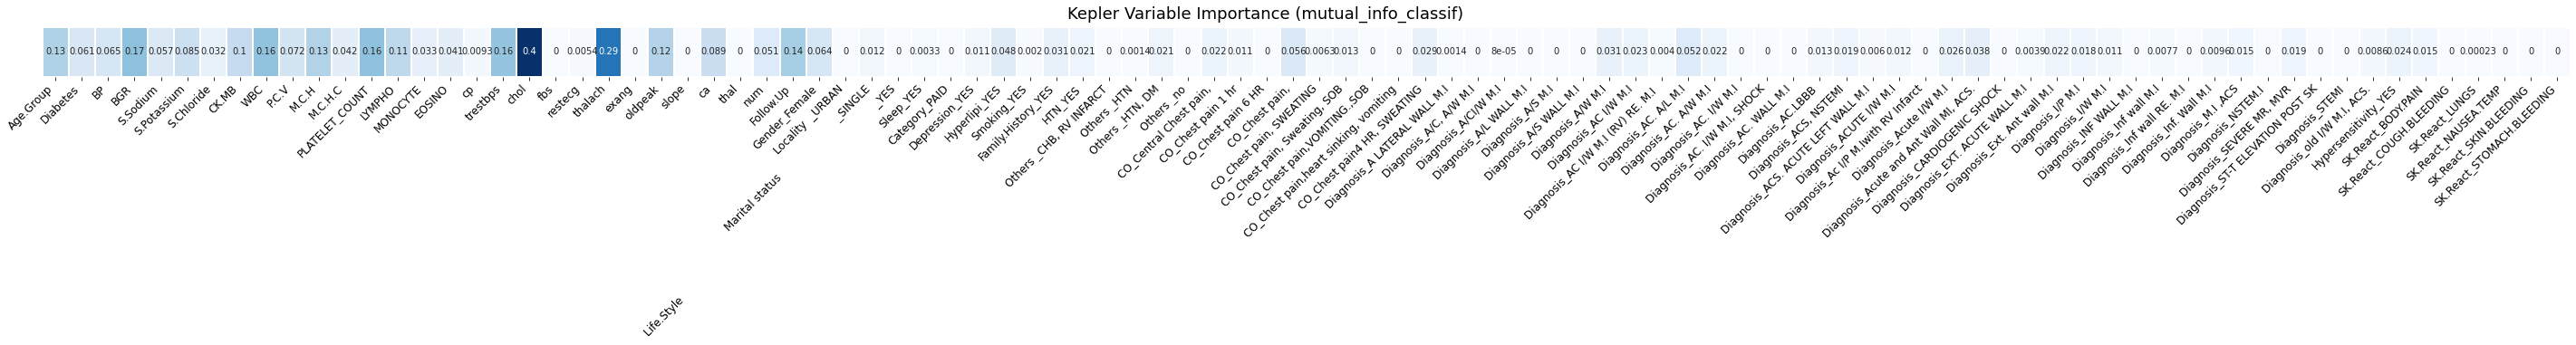

In [121]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

In [124]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 30  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=30)
X_novo2 = trans.fit_transform(X_novo, y)

In [125]:
trans.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True])

In [126]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'Diabetes', 'BP', 'BGR', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'CK.MB', 'WBC', 'P.C.V', 'M.C.H', 'PLATELET_COUNT',
       'LYMPHO', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'Follow.Up',
       'Sleep_YES', 'Category_PAID', 'Hyperlipi_YES', 'Smoking_YES',
       'Diagnosis_A/S WALL M.I', 'Diagnosis_AC. A/L M.I',
       'Diagnosis_ACUTE I/W M.I', 'Diagnosis_SEVERE MR, MVR',
       'SK.React_COUGH.BLEEDING', 'SK.React_STOMACH.BLEEDING'],
      dtype='object')

In [127]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [ ]:
X_novo2.head()

In [129]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [130]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [131]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [132]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [133]:
X_train.shape

(460, 29)

In [135]:
X_test.shape

(74, 29)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.918918918918919

In [137]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [138]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [142]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.918918918918919

In [143]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [144]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [151]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7702702702702703

In [152]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [153]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


Ao reduzir o threshold de 0,9 para 0,7, houve uma melhora de performance do modelo quando o número de k = 3 , não se diferenciando do K = 5, porém mantendo a perda de performance acima deste último valor. O melhor modelo com threshold = 0,7 (k = 3) se assemelhou ao melhor com threshold = 0,9 (k = 5).

Nesse caso a melhor escolha seria com menor número de k ? Menor necessidade de processamento ?

## Alterar a quantidade de features selecionadas pelo mutual information

In [154]:
X.shape

(368, 166)

In [155]:
y.shape

(368,)

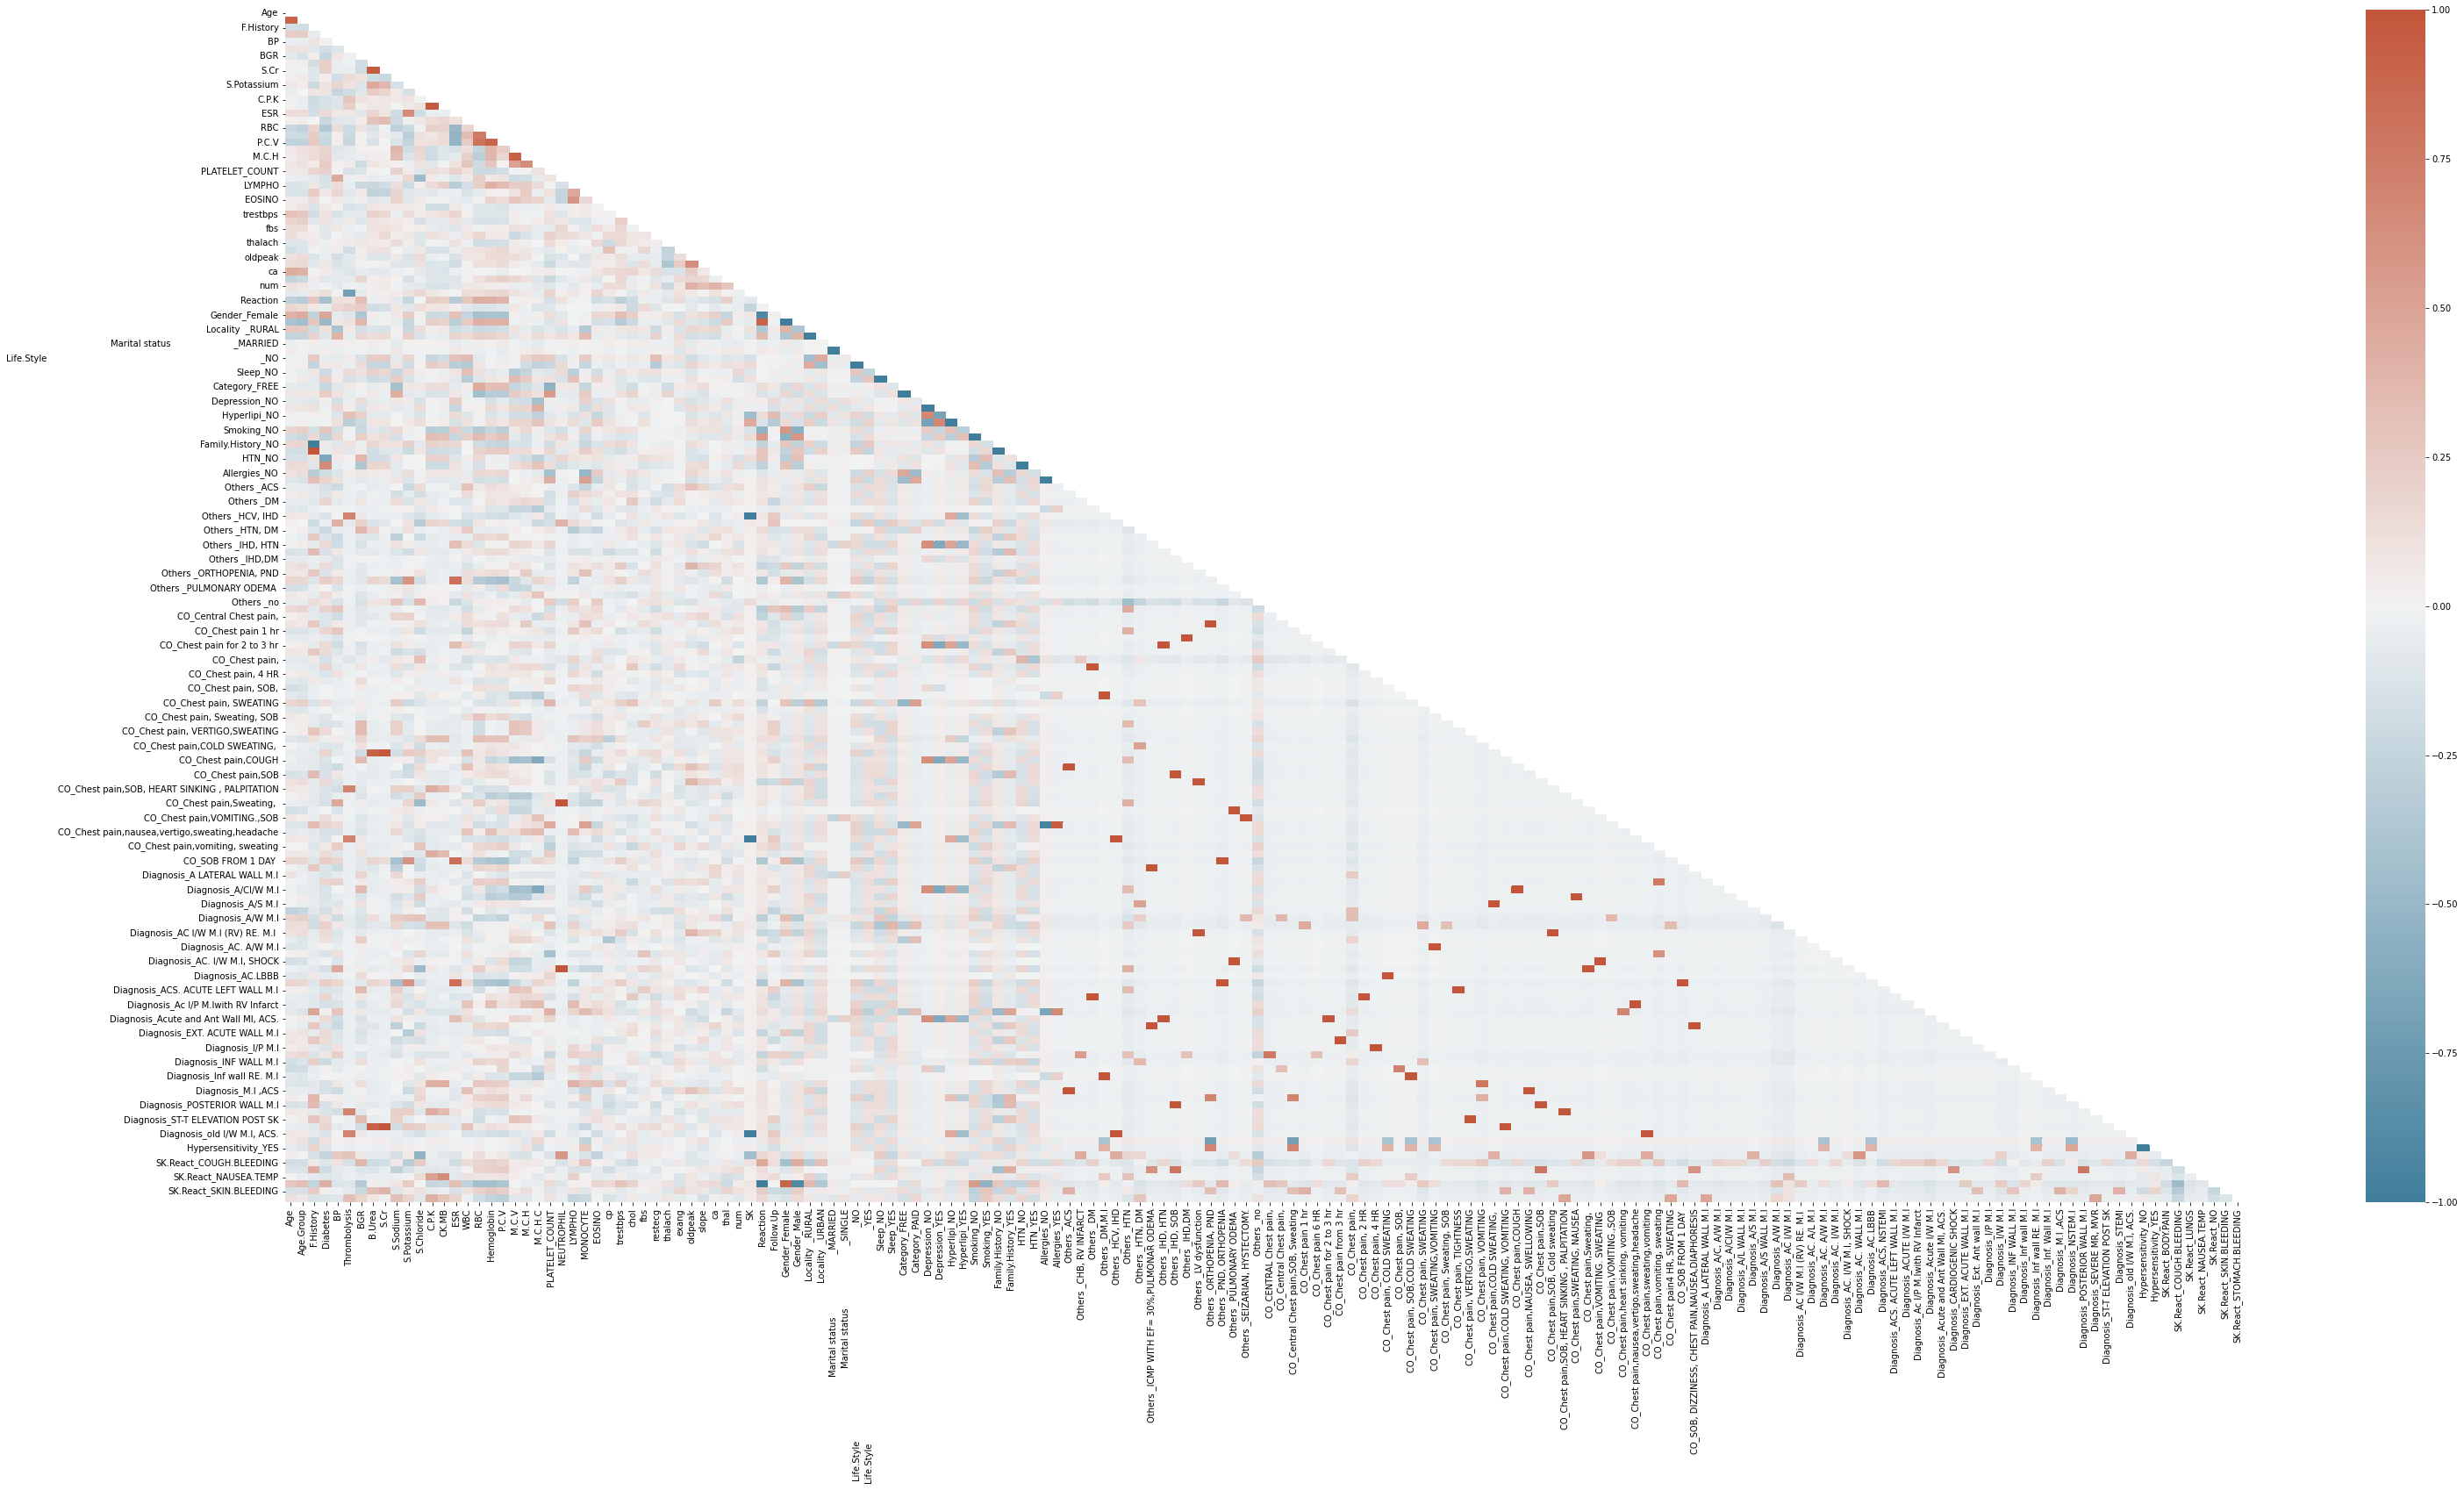

In [156]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [157]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
Thrombolysis - SK
Thrombolysis - Others _HCV, IHD
Thrombolysis - CO_Chest pain,SOB, HEART SINKING , PALPITATION
Thrombolysis - CO_Chest pain,sweating,vomiting
Thrombolysis - Diagnosis_SEVERE MR, MVR
Thrombolysis - Diagnosis_old I/W M.I, ACS.
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
ESR - Others _PND, ORTHOPENIA
ESR - CO_SOB FROM 1 DAY 
ESR - Diagnosis_ACS, NSTEMI
RBC - Hemoglobin
RBC - P.C.V
Hemoglobin - P.C.V
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital statu

In [158]:
len(correlated_features)

70

In [159]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_CENTRAL Chest pain,',
 'CO_Central Chest pain,SOB, Sweating',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain, VOMITING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_Chest pain,vomiting, sweating',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DI

In [160]:
# para clareza na hora da analise, não vamos remover o genero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [161]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [162]:
len(X_novo.columns)

96

Estimar informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes, e valores mais altos significam maior dependência.

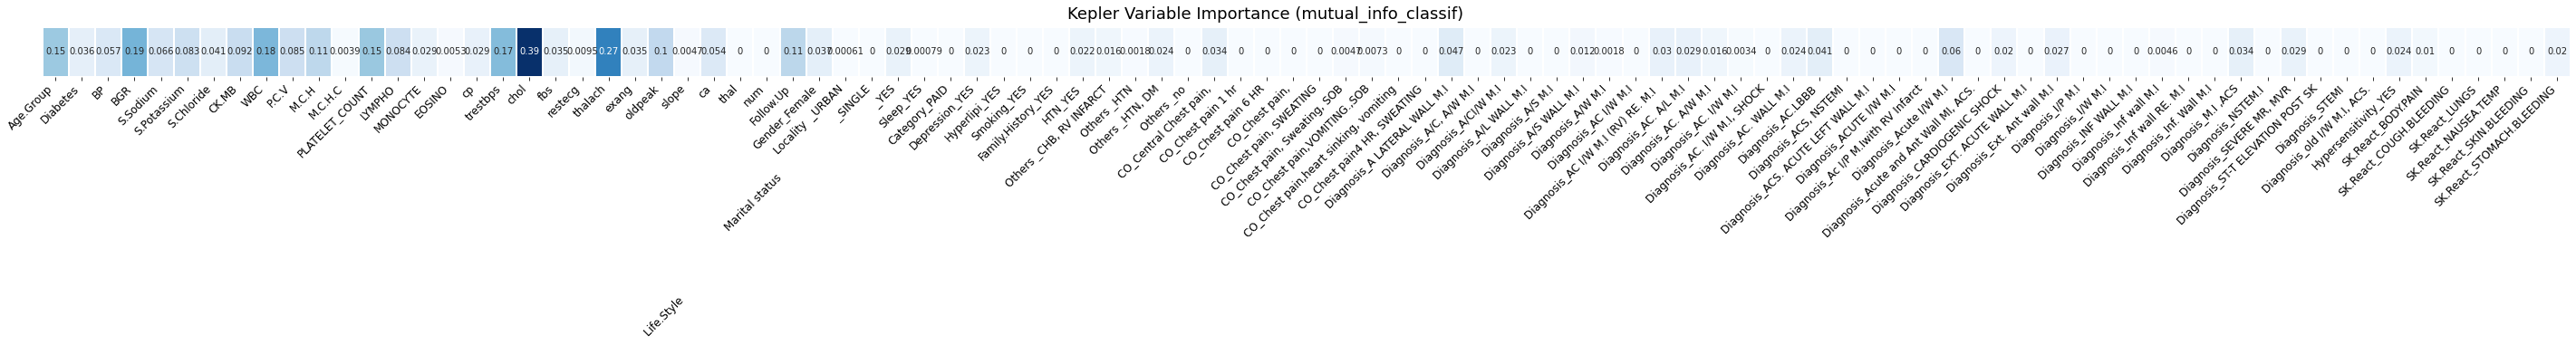

In [164]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

### Selecionar 20 variáveis

In [165]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 20 variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=20)
X_novo2 = trans.fit_transform(X_novo, y)

In [166]:
trans.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [167]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'BP', 'BGR', 'S.Sodium', 'S.Potassium', 'S.Chloride',
       'CK.MB', 'WBC', 'P.C.V', 'M.C.H', 'PLATELET_COUNT', 'LYMPHO',
       'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'Follow.Up',
       'Others _HTN'],
      dtype='object')

In [168]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [169]:
X_novo2.head()

,Age.Group,BP,BGR,S.Sodium,S.Potassium,S.Chloride,CK.MB,WBC,P.C.V,M.C.H,PLATELET_COUNT,LYMPHO,trestbps,chol,thalach,oldpeak,ca,Follow.Up,Others _HTN
0,2.0,100.6,84.0,138.0,3.3,107.0,30.0,9900.0,0.34,27.2,265000.0,0.25,132.0,341.0,136.0,3.0,0.0,60.0,0.0
1,3.0,90.6,135.0,144.0,4.7,104.0,30.0,15800.0,0.44,25.0,287000.0,0.20,130.0,305.0,142.0,1.2,0.0,15.0,0.0
2,3.0,100.7,146.0,137.0,4.2,103.0,22.0,7900.0,0.42,29.0,183000.0,0.33,180.0,327.0,117.0,3.4,0.0,6.0,0.0
3,3.0,160.1,146.0,137.0,4.2,103.0,22.0,7900.0,0.42,29.0,183000.0,0.33,128.0,205.0,130.0,2.0,1.0,52.0,1.0
4,3.0,90.6,85.0,139.0,4.5,112.0,18.0,6900.0,0.36,27.0,211000.0,0.25,200.0,288.0,133.0,4.0,2.0,34.0,0.0


In [170]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [171]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [172]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [173]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [174]:
X_train.shape

(460, 19)

In [175]:
X_test.shape

(74, 19)

In [176]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.918918918918919

In [177]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [178]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [179]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.918918918918919

In [180]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [181]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [182]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7702702702702703

In [183]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [184]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


### **Agora com 40 variáveis**

In [186]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 30  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=40)
X_novo2 = trans.fit_transform(X_novo, y)

In [187]:
trans.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True])

In [188]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'Diabetes', 'BP', 'BGR', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'CK.MB', 'WBC', 'P.C.V', 'M.C.H', 'M.C.H.C',
       'PLATELET_COUNT', 'LYMPHO', 'MONOCYTE', 'cp', 'trestbps', 'chol',
       'thalach', 'oldpeak', 'ca', 'Follow.Up', 'Category_PAID',
       'Others _HTN, DM', 'CO_Chest pain 6 HR', 'CO_Chest pain4 HR, SWEATING',
       'Diagnosis_A/S WALL M.I', 'Diagnosis_A/W M.I',
       'Diagnosis_AC I/W M.I (RV) RE. M.I ',
       'Diagnosis_Acute and Ant Wall MI, ACS.', 'Diagnosis_CARDIOGENIC SHOCK',
       'Diagnosis_EXT. ACUTE WALL M.I', 'Diagnosis_I/W M.I',
       'Diagnosis_INF WALL M.I', 'Diagnosis_NSTEM.I', 'Diagnosis_STEMI',
       'Diagnosis_old I/W M.I, ACS.', 'SK.React_STOMACH.BLEEDING'],
      dtype='object')

In [189]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [190]:
X_novo2.head()

,Age.Group,Diabetes,BP,BGR,S.Sodium,S.Potassium,S.Chloride,CK.MB,WBC,P.C.V,...,Diagnosis_AC I/W M.I (RV) RE. M.I,"Diagnosis_Acute and Ant Wall MI, ACS.",Diagnosis_CARDIOGENIC SHOCK,Diagnosis_EXT. ACUTE WALL M.I,Diagnosis_I/W M.I,Diagnosis_INF WALL M.I,Diagnosis_NSTEM.I,Diagnosis_STEMI,"Diagnosis_old I/W M.I, ACS.",SK.React_STOMACH.BLEEDING
0,2.0,1.0,100.6,84.0,138.0,3.3,107.0,30.0,9900.0,0.34,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,90.6,135.0,144.0,4.7,104.0,30.0,15800.0,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,100.7,146.0,137.0,4.2,103.0,22.0,7900.0,0.42,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,160.1,146.0,137.0,4.2,103.0,22.0,7900.0,0.42,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1.0,90.6,85.0,139.0,4.5,112.0,18.0,6900.0,0.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [192]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [193]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [194]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [195]:
X_train.shape

(460, 38)

In [196]:
X_test.shape

(74, 38)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.918918918918919

In [198]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [199]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [200]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.918918918918919

In [201]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [202]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [203]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7702702702702703

In [204]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [205]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


### Agora com 10 variáveis 

In [206]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 10  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=10)
X_novo2 = trans.fit_transform(X_novo, y)

In [207]:
trans.get_support()

array([ True, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [208]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'BGR', 'WBC', 'M.C.H', 'PLATELET_COUNT', 'trestbps',
       'chol', 'thalach', 'oldpeak', 'Follow.Up'],
      dtype='object')

In [209]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [210]:
X_novo2.head()

,Age.Group,BGR,WBC,M.C.H,PLATELET_COUNT,trestbps,chol,thalach,oldpeak,Follow.Up
0,2.0,84.0,9900.0,27.2,265000.0,132.0,341.0,136.0,3.0,60.0
1,3.0,135.0,15800.0,25.0,287000.0,130.0,305.0,142.0,1.2,15.0
2,3.0,146.0,7900.0,29.0,183000.0,180.0,327.0,117.0,3.4,6.0
3,3.0,146.0,7900.0,29.0,183000.0,128.0,205.0,130.0,2.0,52.0
4,3.0,85.0,6900.0,27.0,211000.0,200.0,288.0,133.0,4.0,34.0


In [211]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [212]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [213]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [214]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [215]:
X_train.shape

(460, 10)

In [216]:
X_test.shape

(74, 10)

In [217]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.918918918918919

In [218]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [219]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [220]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.918918918918919

In [221]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [222]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.78
Sensibilidade: 0.88
Curva ROC: 0.90


In [223]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7702702702702703

In [224]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [225]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


### Agora com 5 variáveis

In [226]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 5  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=5)
X_novo2 = trans.fit_transform(X_novo, y)

In [227]:
trans.get_support()

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [228]:
X_novo.columns[trans.get_support()]

Index(['BGR', 'WBC', 'PLATELET_COUNT', 'chol', 'thalach'], dtype='object')

In [229]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [230]:
X_novo2.head()

,BGR,WBC,PLATELET_COUNT,chol,thalach
0,84.0,9900.0,265000.0,341.0,136.0
1,135.0,15800.0,287000.0,305.0,142.0
2,146.0,7900.0,183000.0,327.0,117.0
3,146.0,7900.0,183000.0,205.0,130.0
4,85.0,6900.0,211000.0,288.0,133.0


In [231]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [232]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [233]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [234]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [235]:
X_train.shape

(460, 5)

In [236]:
X_test.shape

(74, 5)

In [237]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.9054054054054054

In [238]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [239]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.91
Precisão: 0.74
Sensibilidade: 0.88
Curva ROC: 0.89


In [240]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.9054054054054054

In [241]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [242]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.91
Precisão: 0.74
Sensibilidade: 0.88
Curva ROC: 0.89


In [243]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7702702702702703

In [244]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [245]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.77
Precisão: 0.48
Sensibilidade: 0.81
Curva ROC: 0.79


## Alterar a função de distância

In [246]:
X.shape

(368, 166)

In [247]:
y.shape

(368,)

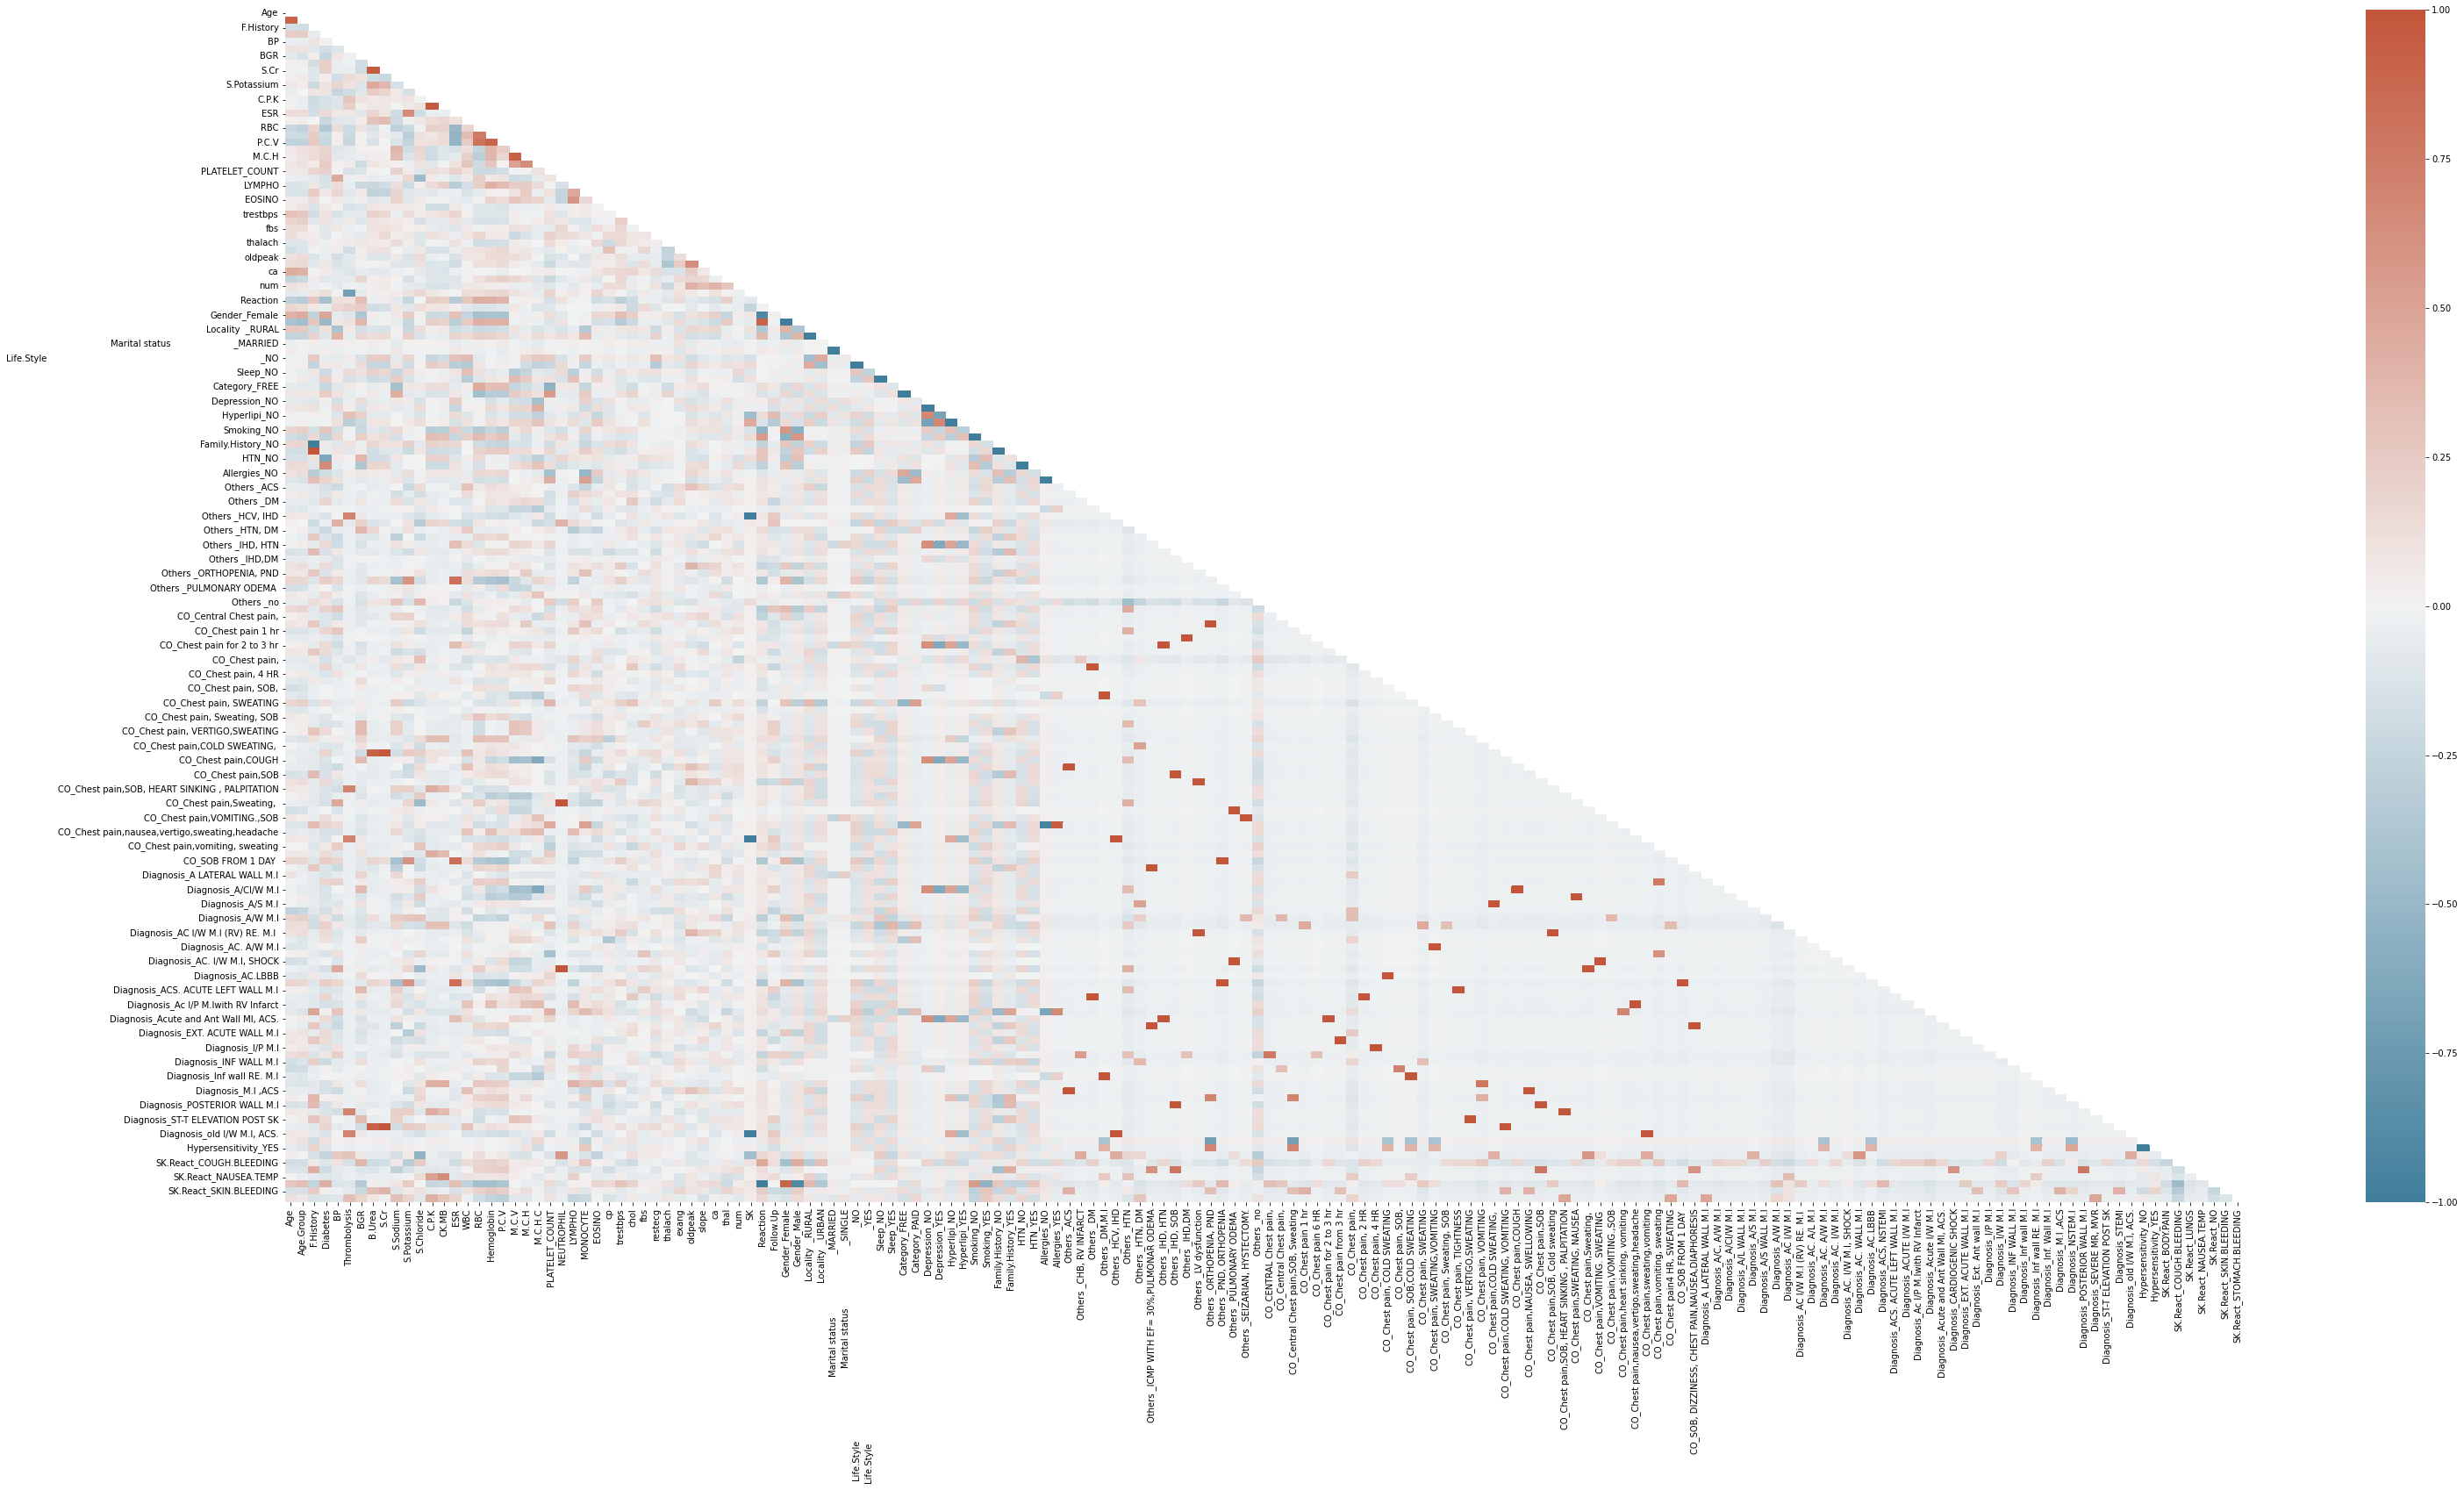

In [248]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [249]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
Thrombolysis - SK
Thrombolysis - Others _HCV, IHD
Thrombolysis - CO_Chest pain,SOB, HEART SINKING , PALPITATION
Thrombolysis - CO_Chest pain,sweating,vomiting
Thrombolysis - Diagnosis_SEVERE MR, MVR
Thrombolysis - Diagnosis_old I/W M.I, ACS.
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
ESR - Others _PND, ORTHOPENIA
ESR - CO_SOB FROM 1 DAY 
ESR - Diagnosis_ACS, NSTEMI
RBC - Hemoglobin
RBC - P.C.V
Hemoglobin - P.C.V
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital statu

In [250]:
len(correlated_features)

70

In [251]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_CENTRAL Chest pain,',
 'CO_Central Chest pain,SOB, Sweating',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain, VOMITING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_Chest pain,vomiting, sweating',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DI

In [252]:
# para clareza na hora da analise, não vamos remover o genero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [253]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [254]:
len(X_novo.columns)

96

Estimar informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes, e valores mais altos significam maior dependência.

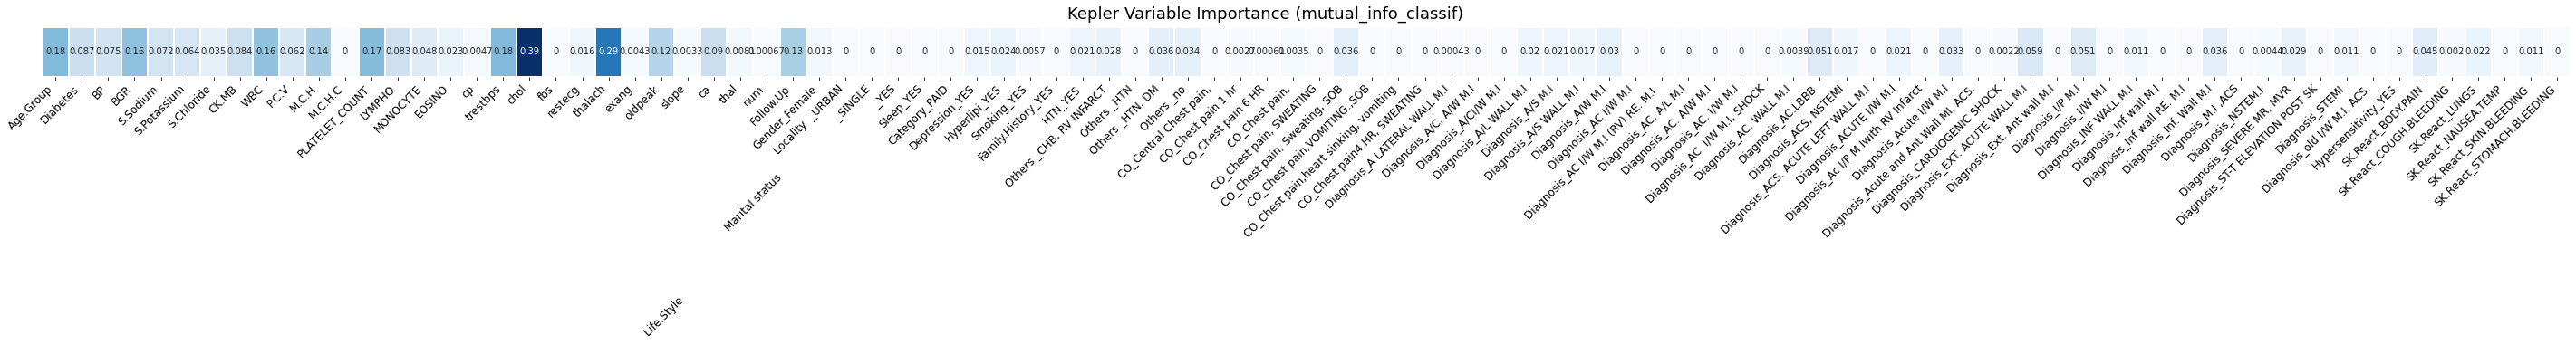

In [255]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

In [256]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 10  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=10)
X_novo2 = trans.fit_transform(X_novo, y)

In [257]:
trans.get_support()

array([ True, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [258]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'BGR', 'WBC', 'M.C.H', 'PLATELET_COUNT', 'trestbps',
       'chol', 'thalach', 'oldpeak', 'Follow.Up'],
      dtype='object')

In [259]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [260]:
X_novo2.head()

,Age.Group,BGR,WBC,M.C.H,PLATELET_COUNT,trestbps,chol,thalach,oldpeak,Follow.Up
0,2.0,84.0,9900.0,27.2,265000.0,132.0,341.0,136.0,3.0,60.0
1,3.0,135.0,15800.0,25.0,287000.0,130.0,305.0,142.0,1.2,15.0
2,3.0,146.0,7900.0,29.0,183000.0,180.0,327.0,117.0,3.4,6.0
3,3.0,146.0,7900.0,29.0,183000.0,128.0,205.0,130.0,2.0,52.0
4,3.0,85.0,6900.0,27.0,211000.0,200.0,288.0,133.0,4.0,34.0


In [261]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [262]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [263]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [264]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [265]:
X_train.shape

(460, 10)

In [266]:
X_test.shape

(74, 10)

### Distâncias
* Para alterar a distância utilizada, é preciso slecionar um valor de p. O default é a **distância Euclidiana** 
* Para usar a **distância de Manhattan**, só selecionar o valor de p =1


In [278]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3, p = 1)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds = neigh.predict(X_test)

accuracy_score(y_test, preds)

0.8918918918918919

In [268]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [269]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.89
Precisão: 0.70
Sensibilidade: 0.88
Curva ROC: 0.89


In [270]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=5, p=1)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds2 = neigh.predict(X_test)

accuracy_score(y_test, preds2)

0.8918918918918919

In [271]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds2)

In [272]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds2)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds2)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds2)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.89
Precisão: 0.70
Sensibilidade: 0.88
Curva ROC: 0.89


In [273]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=7, p = 1)

# Treinamento do modelo
neigh.fit(X_train, y_train)

preds3 = neigh.predict(X_test)

accuracy_score(y_test, preds3)

0.7567567567567568

In [274]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, preds3)

In [275]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, preds3)))
print("Precisão: {:.2f}".format(precision_score(y_test, preds3)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, preds3)))
print("Curva ROC: {:.2f}".format(auc(fpr, tpr)))

Acurácia: 0.76
Precisão: 0.46
Sensibilidade: 0.81
Curva ROC: 0.78


Quando alterado para a distância de Manhattan, houve piora da performance de todos os modelos